## Recursos e bibliotecas

In [ ]:
# Instala o sqlalchemy
!pip install sqlalchemy

In [1]:
# Importa as bibliotecas do projeto
from sqlalchemy import create_engine # Conexão com o SQL Server
import pandas as pd # Manipulação de Dataframes
import numpy as np # Funções matemáticas
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos
from sklearn.model_selection import train_test_split # Separação do modelo em base de treino e teste
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.preprocessing import LabelEncoder # Pré-processamento de dados, varíaveis categóricas em contínuas
from sklearn.metrics import mean_absolute_error # Medida para avaliação do modelo, erro médio absoluto
from sklearn.metrics import mean_squared_error # Medida para avaliação do modelo, erro quadrático
import math # Cálculos matemáticos
import warnings # Ignora avisos
warnings.filterwarnings('ignore')

## Configurando a conexão com nosso banco de dados

In [2]:
# Conectando com o Windows Authentication

try:
    Server = 'DESKTOP-9I30DAT'
    Database = 'ContosoRetailDW'
    Driver = 'ODBC Driver 17 for SQL Server'
    Database_con = f'mssql://@{Server}/{Database}?driver={Driver}'

    engine = create_engine(Database_con)
    conn = engine.connect()
    print("Conexão bem sucedida!")
except:
    print("Conexão falhou")

Conexão bem sucedida!


## Consulta para recuperação dos dados

In [3]:
# Consulta para pegarmos nossa base de dados do nosso banco
query = '''
        select 
                * 
        from vw_base_previsao 
        '''

df = pd.read_sql(query, conn)
#Mostrando as primeiras linhas da nossa base

display(df.head(5))

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Preço Unitário,Custo Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,A. Datum,3.8 x 0.9 x 2.4,5.0,Regular,198.0,91.05,8,1584.0
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,Contoso,11 x 13 x 13,12.6,Economy,19.9,10.15,4,79.6
2,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,The Phone Company,8 x 6 x 1,12.0,Regular,289.0,132.90,8,2312.0
3,7,19/11/2007,2007,November,11,1016,A. Datum Slim Digital Camera M180 Green,Cameras and camcorders,Digital Cameras,A. Datum,4.2 x 2.3 x 1.2,5.6,Economy,148.0,68.06,6,888.0
4,12,29/04/2007,2007,April,4,543,Proseware Projector 480p LCD12 Black,Computers,Projectors & Screens,Proseware,6.6 x 5.4 x 5.2,4.1,Regular,229.0,116.75,10,2290.0


In [4]:
# encerrando a conexão
conn.close()

In [5]:
#Nossa base de dados
df

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Preço Unitário,Custo Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,A. Datum,3.8 x 0.9 x 2.4,5.0,Regular,198.00,91.05,8,1584.00
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,Contoso,11 x 13 x 13,12.6,Economy,19.90,10.15,4,79.60
2,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,The Phone Company,8 x 6 x 1,12.0,Regular,289.00,132.90,8,2312.00
3,7,19/11/2007,2007,November,11,1016,A. Datum Slim Digital Camera M180 Green,Cameras and camcorders,Digital Cameras,A. Datum,4.2 x 2.3 x 1.2,5.6,Economy,148.00,68.06,6,888.00
4,12,29/04/2007,2007,April,4,543,Proseware Projector 480p LCD12 Black,Computers,Projectors & Screens,Proseware,6.6 x 5.4 x 5.2,4.1,Regular,229.00,116.75,10,2290.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,366191,20/03/2008,2008,March,3,2276,Proseware Desk Lamp E0130 Black,Home Appliances,Lamps,Proseware,6.5 x 4 x 9,2.0,Economy,79.95,40.76,9,719.55
199996,366192,05/05/2007,2007,May,5,779,Contoso Dual USB Power Adapter - power adapter...,Computers,Computers Accessories,Contoso,20 x 9.6 x 11,19.7,Economy,39.90,20.34,5,199.50
199997,366194,28/10/2007,2007,October,10,1310,Contoso Digital Camera/Camcorder USB Cable E32...,Cameras and camcorders,Cameras & Camcorders Accessories,Contoso,2.9 x 1 x 4,6.0,Economy,28.00,14.28,5,140.00
199998,366195,26/12/2007,2007,December,12,1392,Contoso Centrex Phone System L10 Grey,Cell phones,Home & Office Phones,Contoso,9.2 x 7 x 4,1.6,Deluxe,42.99,14.24,8,343.92


## Análise Exploratória

Neste caso, nossa base ainda não está no formato ideal para realizarmos a modelagem. Precisaremos agrupar algumas colunas por mês e ano

In [6]:
#Verificando os tipos de dados
df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                       int64
Mês                      object
Número do Mês             int64
ID do Produto             int64
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Marca                    object
Tamanho                  object
Peso                    float64
Classe                   object
Preço Unitário          float64
Custo Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

In [7]:
#Alterando o tipo de dados das coluna que iremos agrupar
conversao = ['Ano', 'Número do Mês', 'ID do Produto']

# Loop para converter as colunas para tipo str
for coluna in conversao:
    df[coluna] = df[coluna].astype(str)

df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                      object
Mês                      object
Número do Mês            object
ID do Produto            object
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Marca                    object
Tamanho                  object
Peso                    float64
Classe                   object
Preço Unitário          float64
Custo Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

Agruparemos nossa base, com isso, vamos ter a soma da quantidade vendida de cada durante os anos

In [8]:
#Agrupando as vendas dos produtos da nossa base por ano e mês
df = df.groupby(['ID do Produto',
                 'Nome do Produto',
                 'Nome da Categoria',
                 'Nome da Subcategoria',
                 'Marca',
                 'Tamanho',
                 'Peso',
                 'Classe',
                 'Custo Unitário',
                 'Preço Unitário']).agg({'Qtd. Vendida':'sum','Faturamento':'sum'}).reset_index(drop=False)

display(df.head(5))

,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Marca,Tamanho,Peso,Classe,Custo Unitário,Preço Unitário,Qtd. Vendida,Faturamento
0,1,Contoso 512MB MP3 Player E51 Silver,Audio,MP4&MP3,Contoso,2.2 x 1.8 x 4,4.80,Economy,6.62,12.99,2063,26798.37
1,10,Contoso 4G MP3 Player E400 Green,Audio,MP4&MP3,Contoso,2.3 x 0.3 x 4,11.00,Economy,30.58,59.99,2185,131078.15
2,100,WWI Wireless Bluetooth Stereo Headphones M170 ...,Audio,Bluetooth Headphones,Wide World Importers,3.3 x 3 x 4.7,5.90,Regular,55.18,120.00,460,55200.00
3,1000,A. Datum Compact Digital Camera M200 Orange,Cameras and camcorders,Digital Cameras,A. Datum,3.9 x 1.1 x 2.4,6.10,Economy,59.32,129.00,2314,298506.00
4,1001,A. Datum Rangefinder Digital Camera X200 Orange,Cameras and camcorders,Digital Cameras,A. Datum,4.8 x 7.8 x 1.7,5.25,Regular,66.26,200.00,2334,466800.00


In [9]:
# Forma da nossa base com 1301 linhas e 12 colunas
df.shape

(1301, 12)

In [10]:
# Verificando valores duplicados
df.duplicated().sum()

0

In [11]:
# Verificando valores únicos
df.nunique()

ID do Produto           1301
Nome do Produto         1301
Nome da Categoria          8
Nome da Subcategoria      23
Marca                     14
Tamanho                  518
Peso                     215
Classe                     3
Custo Unitário           228
Preço Unitário           202
Qtd. Vendida             928
Faturamento             1294
dtype: int64

In [12]:
#Aqui temos as principais medidas das nossas varíaveis contínuas
df.describe()

,Peso,Custo Unitário,Preço Unitário,Qtd. Vendida,Faturamento
count,1301.000000,1301.000000,1301.000000,1301.000000,1.301000e+03
mean,15.957233,60.504612,133.033198,2608.298232,2.501194e+05
std,26.007677,43.148602,96.159821,4644.557580,2.093317e+05
min,0.170000,1.710000,3.350000,168.000000,4.933500e+03
25%,3.500000,15.290000,31.000000,1510.000000,6.316900e+04
50%,6.200000,61.170000,129.900000,2111.000000,2.099916e+05
75%,18.000000,90.550000,209.000000,2331.000000,3.912983e+05
max,228.000000,152.940000,300.000000,52900.000000,1.227106e+06


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço Unitário', ylabel='Preço Unitário'>

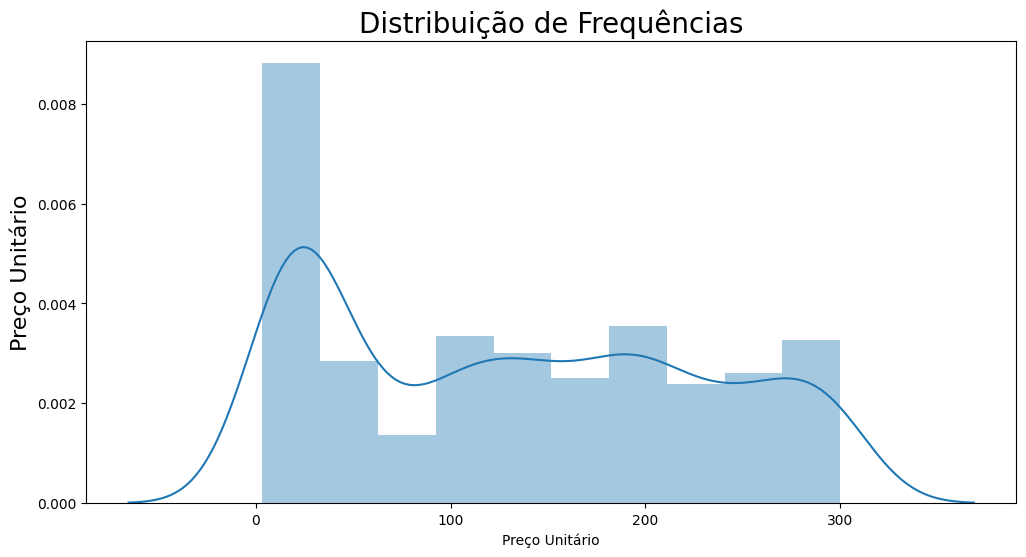

In [13]:
# Histograma para verificarmos a distribuição da varíavel a ser prevista
ax = sns.distplot(df['Preço Unitário'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Preço Unitário', fontsize=16)
ax

## Pré-Processamento

Nossa base tem muitas variáveis categóricas, para isso, vamos realizar um pré-processamento dos dados e fazer uma base auxiliar para termos mais variáveis para realizarmos a análise de correlação entre elas.

In [14]:
base_auxiliar = df.copy()

lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
encoder = ['ID do Produto',
           'Nome do Produto',
           'Nome da Categoria',
           'Nome da Subcategoria',
           'Marca',
           'Tamanho',
           'Classe']

# Loop para conversão das colunas categóricas em númericas
for coluna in encoder:
    base_auxiliar[coluna] = lb.fit_transform(base_auxiliar[coluna])

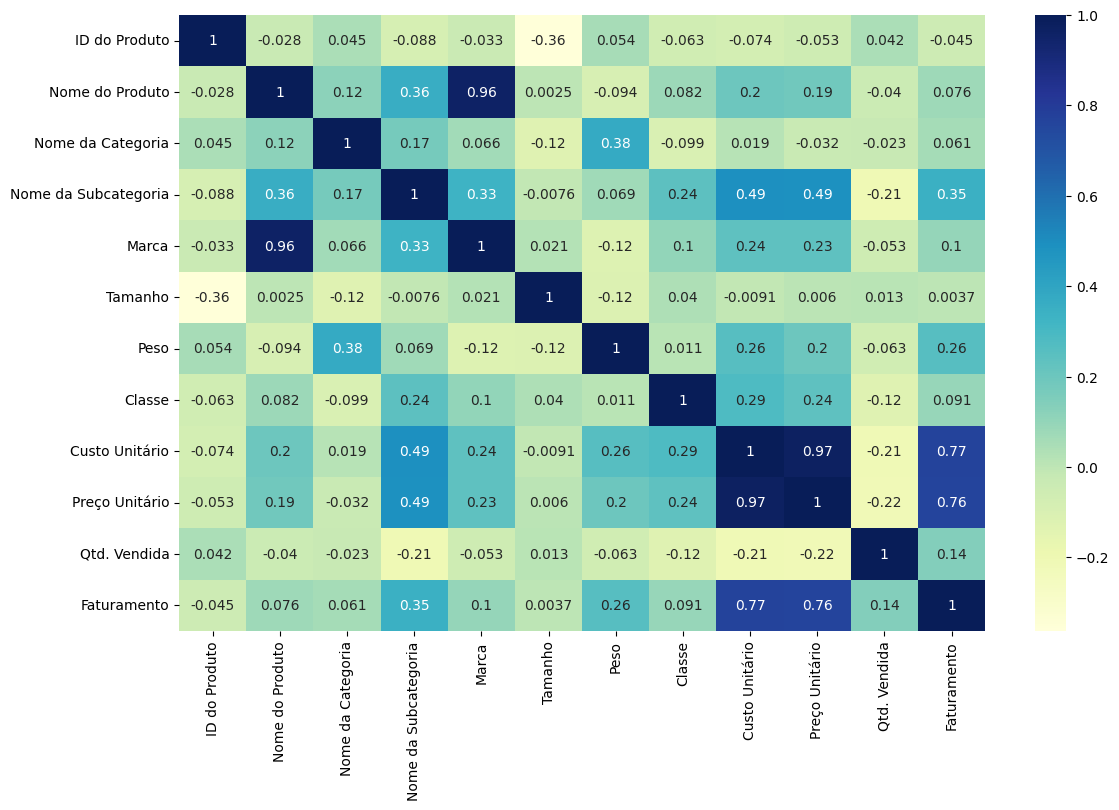

In [15]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base_auxiliar.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Modelagem

- **Regressão Linear Múltipla**

Aqui vamos tirar as variáveis com alta correlação com a nossa variável de preço, menos a informação de custo

In [16]:
# Separando X e Y
X = base_auxiliar.drop(['Preço Unitário','Faturamento'],axis=1)
y = base_auxiliar['Preço Unitário']

In [17]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [19]:
# Visualizando o coeficiente angular
reg.coef_

array([ 8.07014317e-03, -1.89909070e-02, -2.34353377e+00,  6.10090403e-01,
        1.66291286e+00,  7.78131975e-03, -1.64959137e-01, -7.52585974e+00,
        2.17883289e+00, -2.40467772e-04])

In [20]:
# e o coeficiente linear
reg.intercept_

10.911730135461681

In [21]:
# Avaliando o erro e o modelo
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))

13.503362081853549
21.648605999653824


Como podemos ver, nosso modelo preveu com êxito muitos valores, fazendo uma reta muito clara na relação do previsto com os valores reais. Isso se deve por termos utilizado a variável de 'Custo Unitário' como entrada que possui uma correlação muito alta com a variável que estamos querendo prever (Preço Unitário)

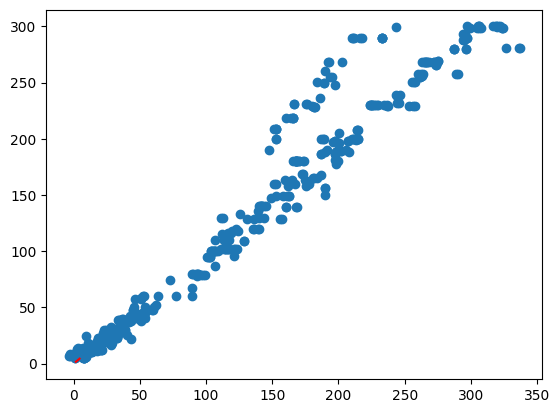

In [22]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

## Preparação da visualização em Power BI

Preparar nossas medidas e tabelas para uma melhor visualização comparativa em nosso Power BI

In [28]:
reais = pd.DataFrame(y_test)

reais

,Preço Unitário
478,16.99
722,119.99
312,208.00
661,149.00
969,229.00
...,...
570,99.99
485,299.99
314,288.00
1053,129.00


In [34]:
previstos = pd.DataFrame({'Valores Previstos': y_pred.round(2)})

previstos

,Valores Previstos
0,15.24
1,135.83
2,214.95
3,157.74
4,253.35
...,...
425,106.18
426,321.78
427,294.43
428,130.89


In [35]:
erro_quadratico = math.sqrt(mean_squared_error(y_test, y_pred))
erro_medio_absoluto = mean_absolute_error(y_test, y_pred)

df_resultados = pd.DataFrame({
    'Erro Quadrático': [erro_quadratico],
    'Erro Médio Absoluto': [erro_medio_absoluto]
})

df_resultados

,Erro Quadrático,Erro Médio Absoluto
0,21.648606,13.503362
